In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sb
from pprint import pprint
from pandas.plotting import andrews_curves
plt.style.use('default')

In [2]:
data = pd.read_csv('DO_cast2_Chile swordfish_3-18-19.txt', sep="\t")
# print(data.head)
data = data.iloc[1:].dropna()
data['Date'] = pd.to_datetime(data['Time']).dropna()
# print(data.columns)
DATES = data['Date'].tolist()
dates, times = [], []
for _ in DATES:
    dates.append(_.date())
    times.append(_.time())
t, times = times, []
for time in t:
    times.append(60*60*time.hour + 60*time.minute + time.second + time.microsecond/1E6)
data['Date'] = dates
data['Time'] = times
data = data[['Date', 'Time', 'Depth', 'Temperature', 'DO mg/l']]
data.columns = ['Date', 'Time', 'D', 'T', 'DO']
# data.head()

data2 = pd.read_csv('A15226.txt', sep="\t")
# print(data2.head)
data2 = data2.iloc[1:].dropna()
data2['Date'] = pd.to_datetime(data2['Date local DST']).dropna()
# print(data2.columns)
DATES = data2['Date'].tolist()
dates, times = [], []
for _ in DATES:
    dates.append(_.date())
    times.append(_.time())
t, times = times, []
for time in t:
    times.append(60*60*time.hour + 60*time.minute + time.second + time.microsecond/1E6)
data2['Date'] = dates
data2['Time'] = times
data2 = data2[['Date', 'Time', 'Depth (m)', 'Temp (C)']]
data2.columns = ['Date', 'Time', 'D', 'T']
data2.head()

,Date,Time,D,T
1,2019-03-17,55980.0,54.87,16.609
2,2019-03-17,56040.0,70.87,13.938
3,2019-03-17,56100.0,74.87,13.266
4,2019-03-17,56160.0,74.37,13.172
5,2019-03-17,56220.0,75.37,13.172


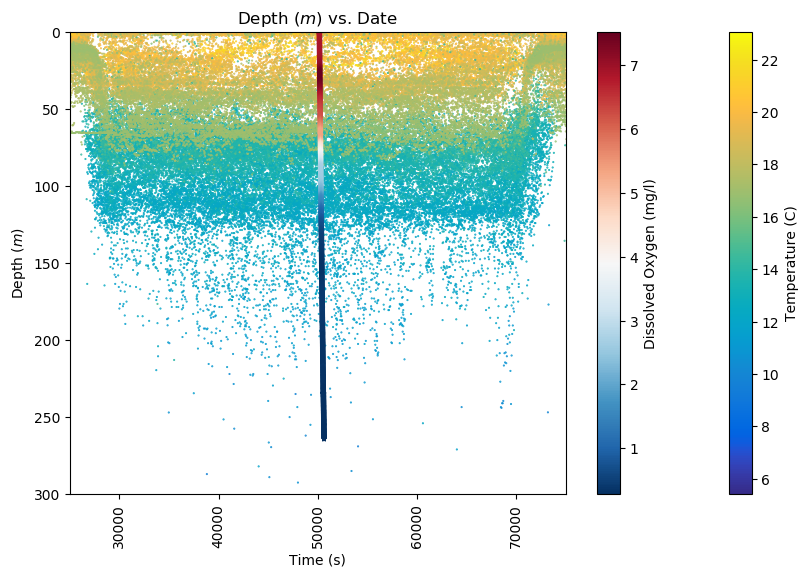

In [17]:
plt.figure(1, figsize=(10,6))
#labels
plt.xlabel('Time (s)')
plt.ylabel('Depth ($m$)')
plt.title('Depth ($m$) vs. Date')

#c sequence
c1 = data['DO']
c2 = data2['T']

# #plot
plt.scatter( data2['Time'], data2['D'] , c=c2, 
            cmap = parula_map, s = np.ones_like(c2), marker='.')
cbar2 = plt.colorbar()
cbar2.set_label("Temperature (C)")
plt.scatter( data['Time'], data['D'] , c=c1, 
            cmap = 'RdBu_r', s = 10*np.ones_like(c1), marker='*')
cbar1 = plt.colorbar()
cbar1.set_label("Dissolved Oxygen (mg/l)")
plt.xticks(rotation=90)
plt.xlim(25000, 75000)
# plt.ylim(1.1618*data2['D'].min(), 1.1618*data2['D'].max())
plt.ylim(0,300)

# labels = ['Midnight', '3A', '6A', '9A', 'Noon', '3P', '6P', '9P']
# ticks = list(range(int(data['Time'].max())))
# LABELS = ticks
# LABELS[0] = labels[0]
# LABELS[-1] = labels[-1]
# plt.xticks(ticks, LABELS)

plt.gca().invert_yaxis()
plt.savefig(dpi=300,'DOplot.png')

In [4]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map

In [ ]:
bins = np.linspace(0, data['D'].max(), 800)
x, y = times, bins
# generate 2 2d grids for the x & y bounds
x, y = np.meshgrid(x, y)
times = list(set(data['Time'].tolist()))
d = []
for time in times:
    temp = data[data.Time == time].dropna()
    hist, bins = np.histogram(temp['D'].tolist(), bins=bins)
    d.append(hist)

z = np.array(d).T
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z_min, z_max = 0, np.abs(z).max()

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
# c = ax.pcolormesh(x, y, z, cmap=parula_map, vmin=z_min, vmax=z_max)
c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('Depth ($m$) vs. Time')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax, label='Count')
plt.gca().invert_yaxis()
plt.xlabel('Time')

# labels = ['Midnight', '3A', '6A', '9A', 'Noon', '3P', '6P', '9P']

# ax.xaxis.set_ticklabels(labels)
plt.ylabel('Depth ($m$)')
# asdf = data[data['D'] > 300]
# plt.plot(asdf['Time'], asdf['D'], '.', mfc='none', markersize=2, alpha=0.1)
plt.show()